# Неделя 2: аппрокисмация

## 1

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [6]:
from math import *
def tgt(x):
    return sin(x/5)*exp(x/10)+5*exp(-x/2)
tgt(2)

In [63]:
import numpy as np
xs = np.arange(1,15,.5)
xs

array([  1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,   5. ,
         5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,
        10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,  14. ,  14.5])

In [64]:
ys = list((map(tgt,xs)))
ys

[3.252216865271419,
 2.7051782592223566,
 2.3150338432311584,
 2.048118561277957,
 1.8778384165859365,
 1.7830581314410336,
 1.7468459495903677,
 1.7554972604004602,
 1.7977761044492575,
 1.864327152405655,
 1.9472212830789883,
 2.0396060844557855,
 2.135438978951904,
 2.2292856324918886,
 2.316170159053224,
 2.391466621485899,
 2.450823645392045,
 2.490115753360383,
 2.5054164070002463,
 2.4929888037226564,
 2.4492912840300085,
 2.3709948177977695,
 2.25501049731666,
 2.098525304091471,
 1.8990446617425354,
 1.654440459424146,
 1.3630033452333579,
 1.023498160060744]

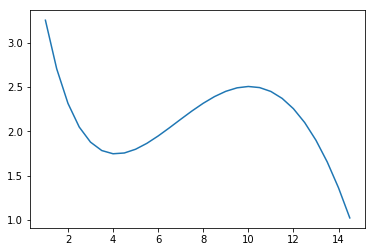

In [65]:
import matplotlib.pyplot as plt
plt.plot(xs,ys)
plt.show()

In [66]:
def lmap(function, vals):
    return list(map(function, vals))

In [71]:
from scipy import linalg
x1 = [1,15]
y1 = lmap(tgt,x1)
y1

[3.252216865271419, 0.6352214195786656]

In [68]:
a1 = np.array([[1, 1], [1, 15]])
b1 = np.array(y1)

w1 = linalg.solve(a1, b1)
w1

array([ 3.43914511, -0.18692825])

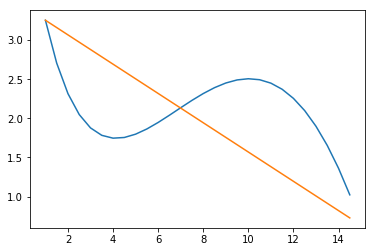

In [70]:
def apr1(x):
    return w1[0] + w1[1]*x

ys1 = lmap(apr1,xs)
plt.plot(xs,ys,xs,ys1)
plt.show()

## 2

Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [72]:
x2 = [1,8,15]
y2 = lmap(tgt,x2)
y2

[3.252216865271419, 2.316170159053224, 0.6352214195786656]

In [79]:
a2 = np.array([[1, x, x**2] for x in x2])
b2 = np.array(y2)

w2 = linalg.solve(a2, b2)
w2

array([ 3.32512949, -0.06531159, -0.00760104])

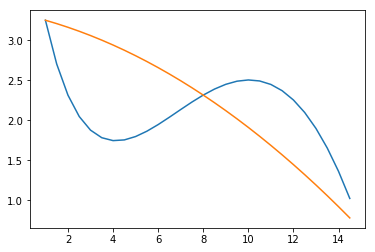

In [83]:
def apr2(x):
    return w2[0] + w2[1]*x + w2[2]*x**2

ys2 = lmap(apr2,xs)
plt.plot(xs,ys,xs,ys2)
plt.show()

## 3

Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

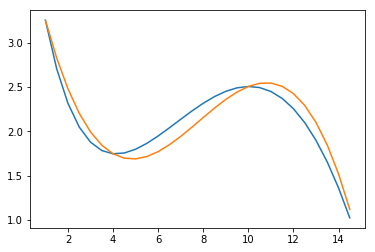

In [109]:
x3 = [1,4,10,15]
y3 = lmap(tgt,x3)

a3 = np.array([[1, x, x**2, x**3] for x in x3])
b3 = np.array(y3)

w3 = linalg.solve(a3, b3)

def apr3(x):
    return w3[0] + w3[1]*x + w3[2]*x**2 + w3[3]*x**3

ys3 = lmap(apr3,xs)
plt.plot(xs,ys,xs,ys3)
plt.show()

In [110]:
w3

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

## 4

Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [111]:
rslt = lmap(lambda x: '{:.2f}'.format(round(x,2)),w3)
rslt

['4.36', '-1.30', '0.19', '-0.01']

In [112]:
out = open("submission-2.txt", "w")
out.writelines(digit + ' ' for digit in rslt)
out.close()